# **Marketing Campaign for Banking Products**


# **Objective**

The classification goal is to predict the likelihood of a liability customer buying personal
loans.


# **Context**


The bank has a growing customer base. The bank wants to increase borrowers (asset customers) base to bring in more loan business and earn more through the interest on loans. So , the bank wants to convert the liability based customers to personal loan customers. (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. The department wants you to build a model that will help them identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.


# **Data Description**



The file Bank.xls contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

Data Link:https://www.kaggle.com/itsmesunil/bank-loan-modelling/download


## Data Attribute Information:

● ID: Customer ID

● Age: Customer's age in completed years

● Experience: #years of professional experience

● Income: Annual income of the customer ($000)

● ZIP Code: Home Address ZIP code.

● Family: Family size of the customer

● CCAvg: Avg. spending on credit cards per month ($000)

● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional

● Mortgage: Value of house mortgage if any. ($000)

● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?

● Securities Account: Does the customer have a securities account with the bank?

● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?

● Online: Does the customer use internet banking facilities?

● Credit card: Does the customer use a credit card issued by the bank?




# **ML CODE**


## **STEP 1**


### **Importing the datasets,libraries**

In [ ]:

#Importing necessary libraries
import numpy as np                                      #linear algebra
import pandas as pd                                     #data processing
import matplotlib.pyplot as plt                         #graph plotting
%matplotlib inline
import seaborn as sns                                   #graph plotting
sns.set(style="ticks")
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer      #PowerTransform
from sklearn.model_selection import train_test_split    #Split into train and test
from sklearn.preprocessing import StandardScaler        #Perprocessing-StandardScaler
from sklearn.linear_model import LogisticRegression     #Logistic Regression
from sklearn.metrics import f1_score                    #F1 Score
from sklearn.metrics import classification_report       #Classification Report
from sklearn.neighbors import KNeighborsClassifier      #KNN Classifier
from sklearn.tree import DecisionTreeClassifier         #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier     #RandomForestClassifier
from sklearn.naive_bayes import GaussianNB              #Naive Bayes Classifier 


**Importing Dataset**


In [ ]:
df = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx','Data')


Data file is an excel document named 'Bank_Personal_Loan_Modelling.xlsx'



**Displaying number of rows and columns**


In [ ]:
df.shape

(5000, 14)


There are 5000 data items and 14 features in the given data



**Displaying first 10 data values**


In [ ]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0



**Displaying last few values**


In [ ]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1



**Displaying datatype for each feature**


In [ ]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object


**Displaying Column Index**


In [ ]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')


**Printing a concise summary of a DataFrame**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB



**Generate descriptive statistics of DataFrame columns**


In [ ]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000



Here experience has negative values that is not a proper value as experience cannot be negative.



## **STEP 2**


### **Data Cleaning**

Removing unwanted data and filtering out wrong data values.



**Counting the missing values in the column**


In [ ]:
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**Counting the missing values in the rows**


In [ ]:
df.apply(lambda x: sum(x.isnull().values), axis = 1) # For rows

0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Length: 5000, dtype: int64


We can infer from the above data that there is no NULL/NaN values in the dataset.



**Printing number of negative values in 'Experience' column**


In [ ]:
df[df['Experience'] < 0]['Experience'].count()

52


There are 52 negative values in the 'Experience' Column. 



**Displaying median of 'Experience' column**


In [ ]:
data=df
df['Experience'].median()

20.0


Median of Experience column is 20.



**Displaying number of unique values in each column**


In [ ]:
df.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64


**Replacing negative 'Experience' with median**


In [ ]:
df = df.mask(df < 0, np.nan)
medianFiller = lambda x: x.fillna(x.median())
df = df.apply(medianFiller,axis=0)
print(df[df['Experience'] < 0]['Experience'].count())

0



So,now there is no negative values in Experience column



**Removing 'ID' column as it doesn't have impact on the model**


In [ ]:
df=df.drop(['ID'],axis=1)
df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
#Give a descrition about the data
df.describe()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,20.327600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,11.253035,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,0.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,11.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
#Displaying unique values in each column
df.nunique()

Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

## **STEP 3**

### **EDA(Exploratory Data Analysis)**


**Finding unique items in each column**


In [ ]:
print("Number of unique in each column:")
df.nunique()

Number of unique in each column:


Age                    45
Experience             44
Income                162
ZIP Code              467
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64


**Finding number or people with zero mortage**


In [ ]:
print("Number of people with zero mortage:")
df['Mortgage'].isin([0]).sum()


Number of people with zero mortage:


3462


**Finding number of people with zero credit card spending per month**


In [ ]:
print("Number of people with zero credit card spending per month:")
df[df['CCAvg']==0]['CCAvg'].count()

Number of people with zero credit card spending per month:


106


**Finding value counts of all categorical columns**


In [ ]:
print(df['Family'].value_counts())
print(df['Education'].value_counts())
print(df['Personal Loan'].value_counts())
print(df['Securities Account'].value_counts())
print(df['CD Account'].value_counts())
print(df['Online'].value_counts())
print(df['CreditCard'].value_counts())

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
1    2096
3    1501
2    1403
Name: Education, dtype: int64
0    4520
1     480
Name: Personal Loan, dtype: int64
0    4478
1     522
Name: Securities Account, dtype: int64
0    4698
1     302
Name: CD Account, dtype: int64
1    2984
0    2016
Name: Online, dtype: int64
0    3530
1    1470
Name: CreditCard, dtype: int64



**Univariate Analysis**


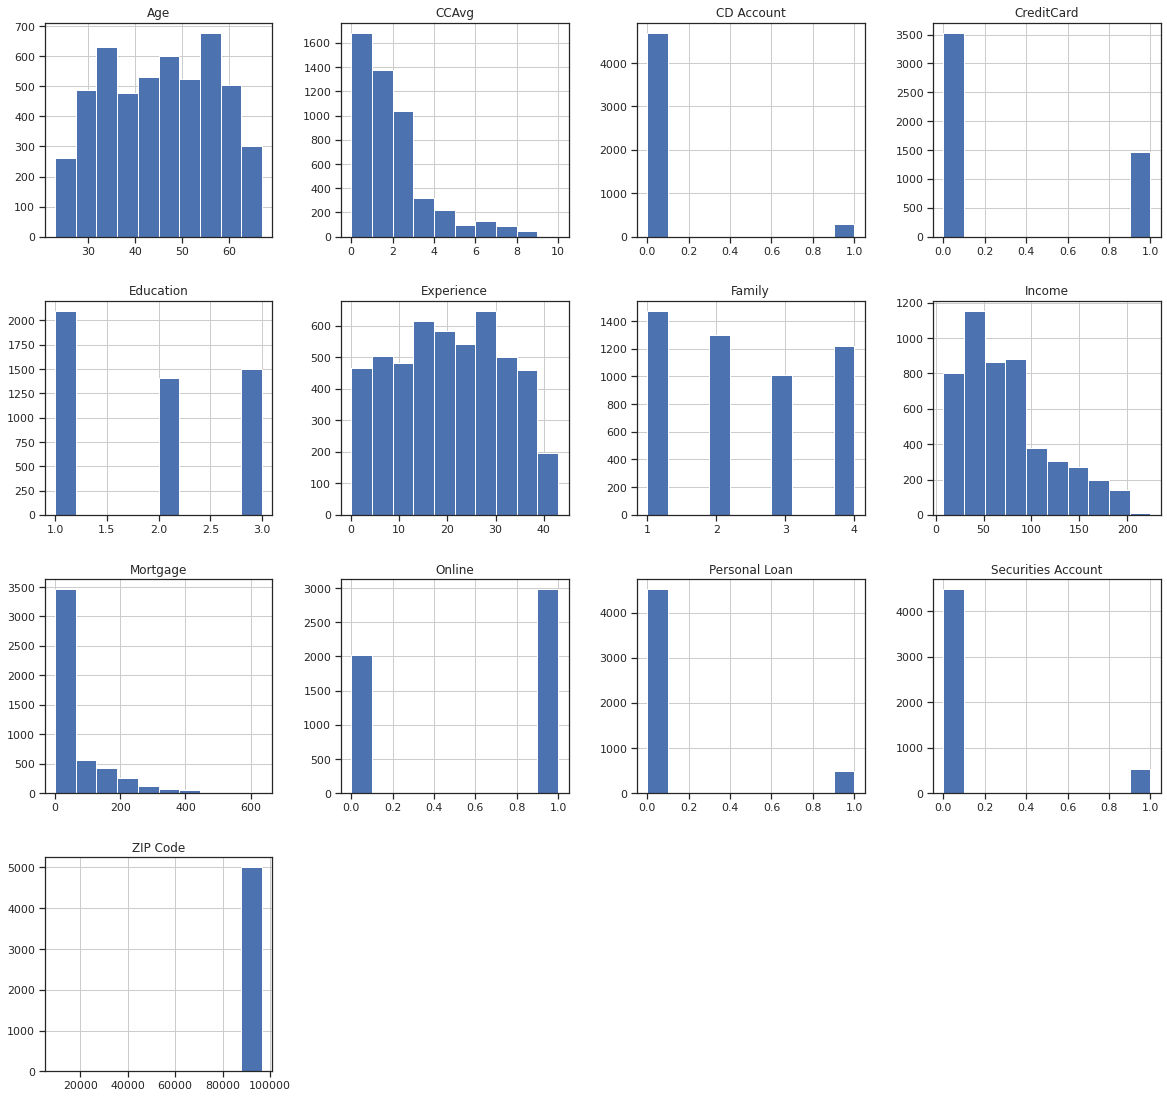

In [ ]:
#Categorical Representation
df.hist(stacked=False, figsize=(20,50), layout=(10,4));

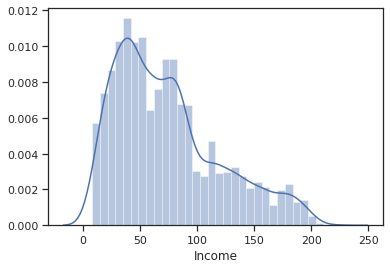

In [ ]:
sns.distplot(df['Income'])

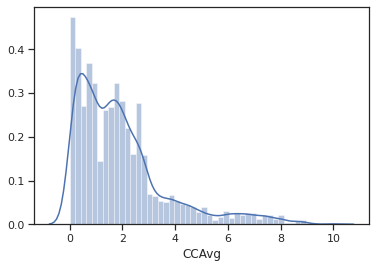

In [ ]:
sns.distplot(df['CCAvg'])

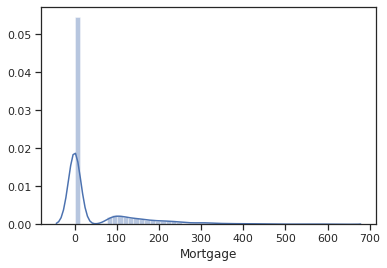

In [ ]:
sns.distplot(df['Mortgage'])


From these graphs we can understand that there is skewness in 'Income','CCAvg','Mortgage'.



**Bivariate Analysis**


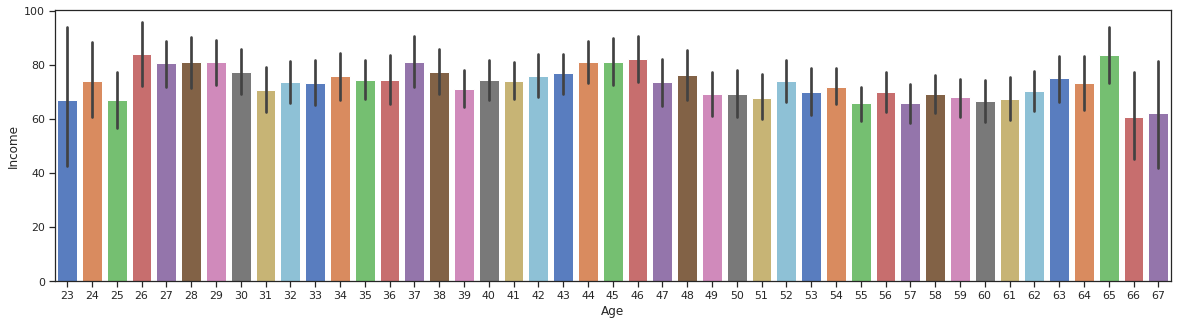

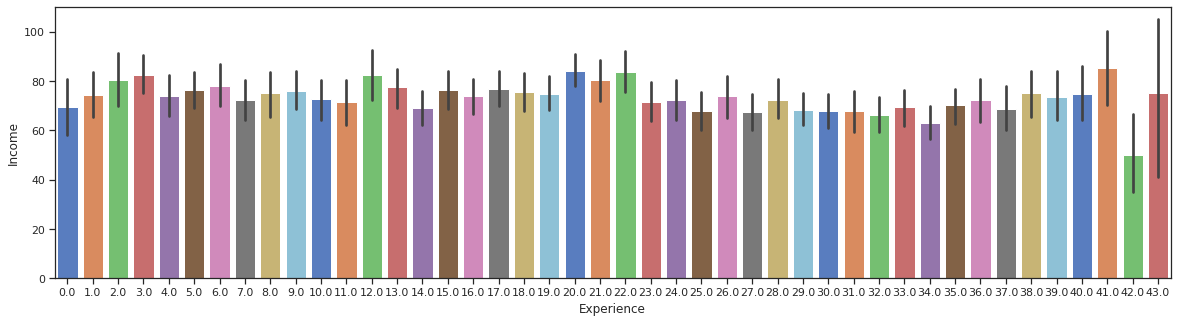

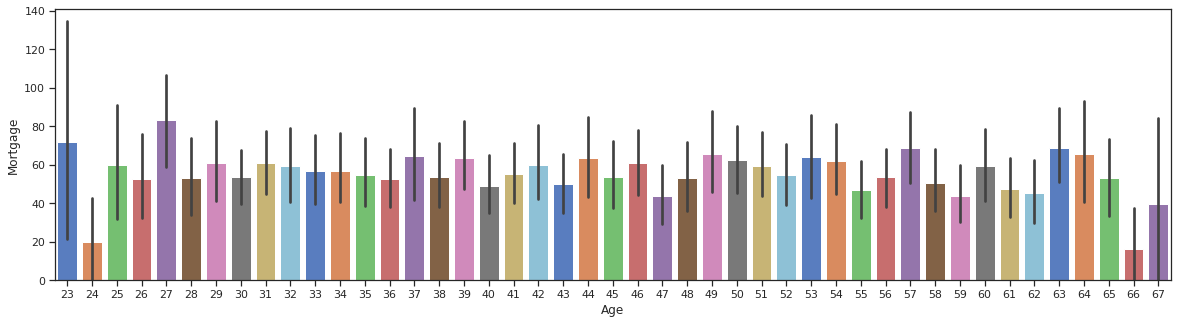

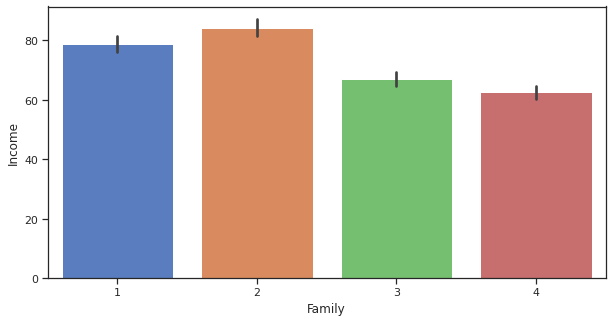

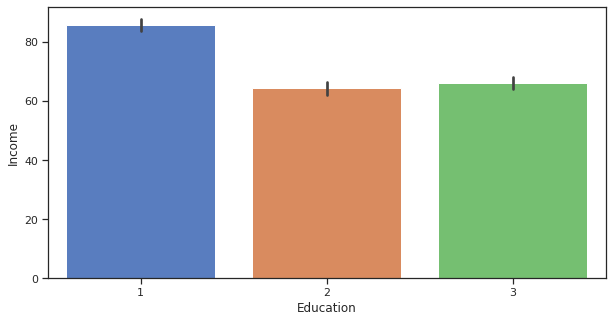

In [ ]:
#Bivariate Analysis 1
plt.figure(figsize=(20,5))  # setting the figure size
ax = sns.barplot(x='Age', y='Income', data=df, palette='muted')  

plt.figure(figsize=(20,5))  # setting the figure size
ax = sns.barplot(x='Experience', y='Income', data=df, palette='muted')  

plt.figure(figsize=(20,5))  # setting the figure size
ax = sns.barplot(x='Age', y='Mortgage', data=df, palette='muted')  

plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Family', y='Income', data=df, palette='muted')  

plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='Education', y='Income', data=df, palette='muted')

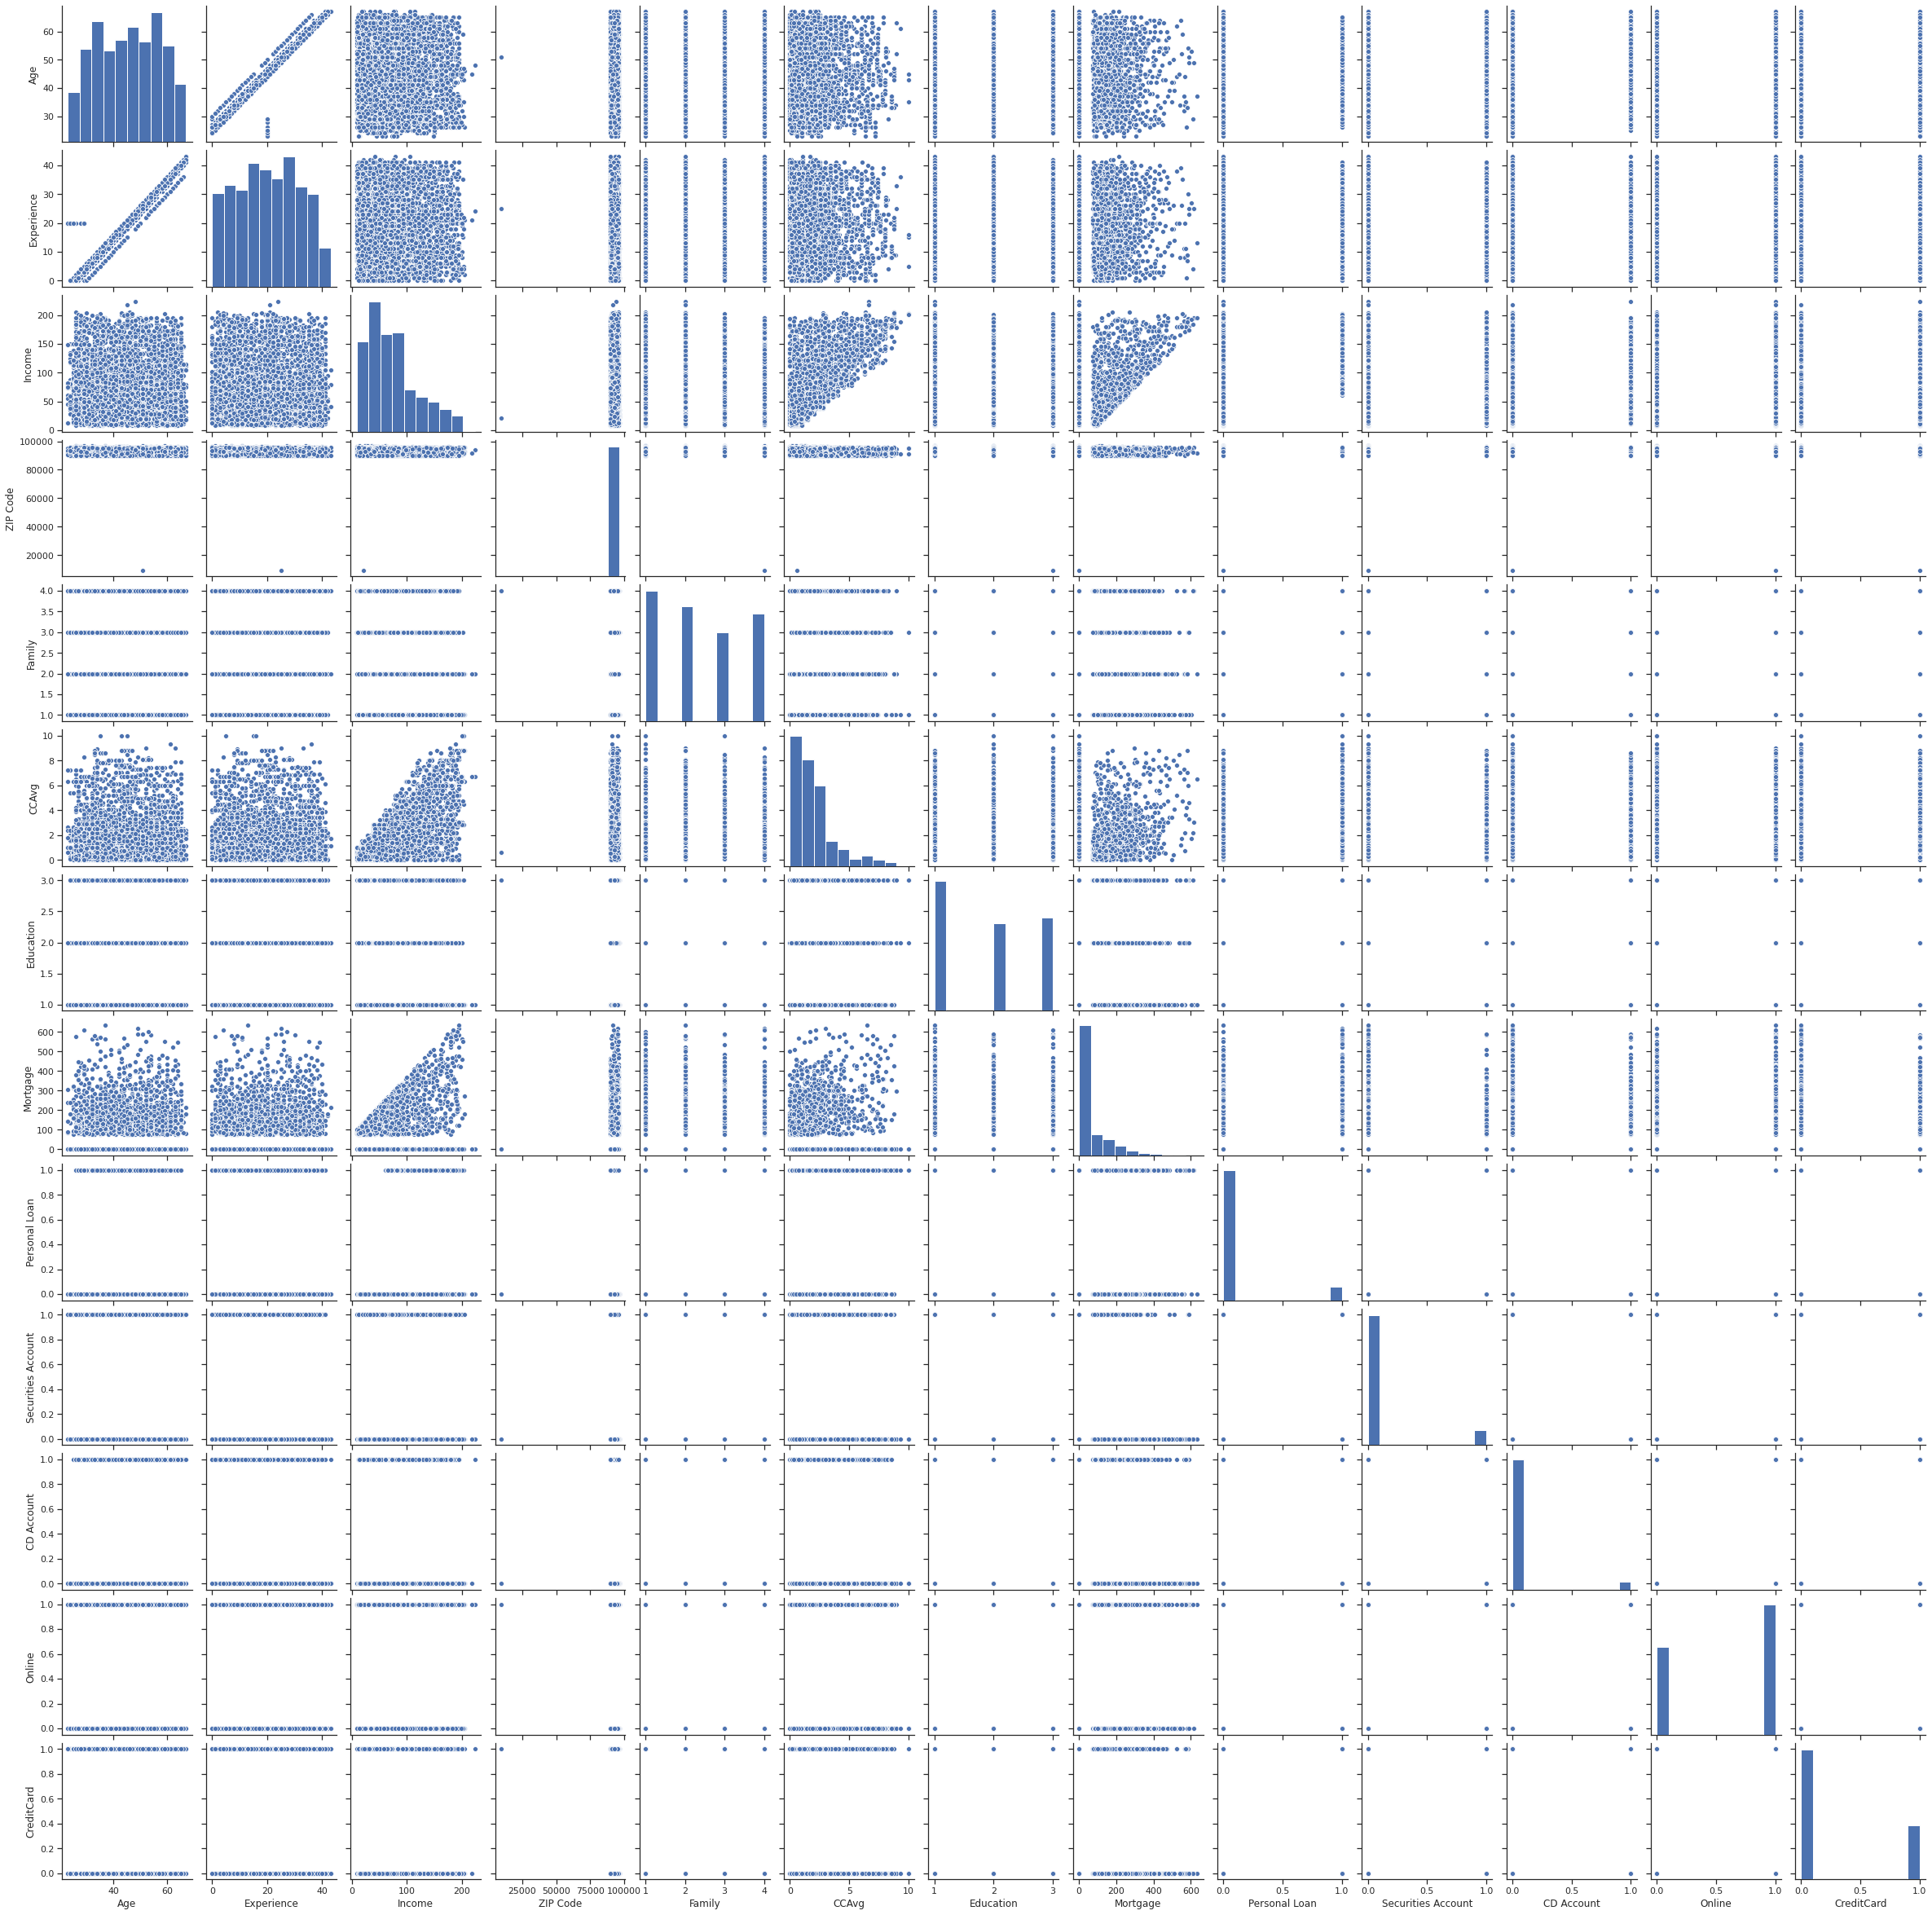

In [ ]:
#Bivariate Analysis 2
sns.pairplot(df)
plt.show()

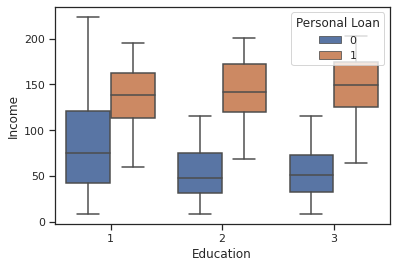

In [ ]:
#Bivariate analysis 3
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=df)


## **STEP 4**


### **Transformations**



**Correlation Table**


In [ ]:
df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048730,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000465,-0.002616,0.004704,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028




We can understand from the above data that there is correlation between 'Age' and 'Experience'.It is more clear from the below heatmap.




**Finding correlation between 'Experince' and 'Age'**



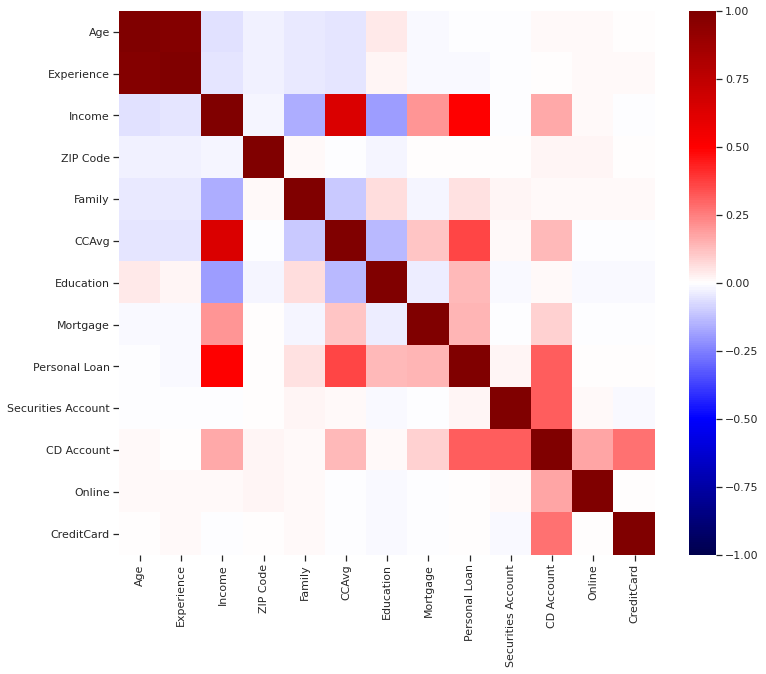

In [ ]:
#Heat map with Correlation data
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='seismic',linewidths=0)

In [ ]:
corr_Exp=df['Experience'].corr(df['Age'])
corr_Exp

0.9771816883703435


There is almost 98% correlation between Age and Experience column.



**Removing 'Experience' and 'ZIP Code' column**



'Experience' column is removed as there is high correlation between 'Age' and 'Experience'.

'Zip Code' column is removed as it doesn't have any impact on the model.


In [ ]:
data=df.drop(['Experience','ZIP Code'],axis=1)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.shape

(5000, 11)


Now there are only 11 columns(or features).



**Finding skewness**


In [ ]:
data.skew()

Age                  -0.029341
Income                0.841339
Family                0.155221
CCAvg                 1.598457
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64


**Applying PowerTransform on Income**


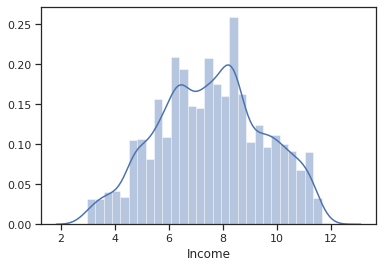

In [ ]:
pt= PowerTransformer(method='yeo-johnson' ,standardize=False)             #method used is 'yeo-johnson'
data['Income']=pt.fit_transform(data['Income'].values.reshape(-1,1))
sns.distplot(data['Income'])


**Applying PowerTransform on CCAvg**


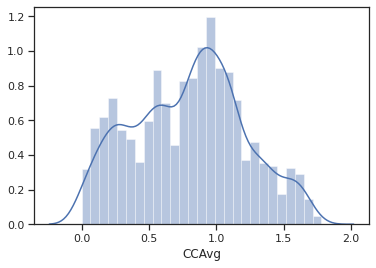

In [ ]:
pt= PowerTransformer(method='yeo-johnson',standardize=False)
data['CCAvg']=pt.fit_transform(data['CCAvg'].values.reshape(-1,1))
sns.distplot(data['CCAvg'])


**Applying Binning on Mortgage**


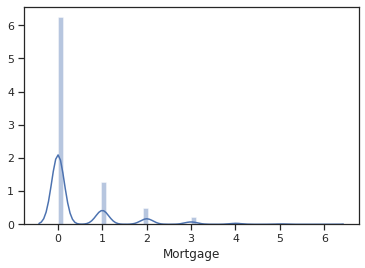

In [ ]:
data['Mortgage']=pd.cut(df['Mortgage'],bins=[0,100,200,300,400,500,600,700],labels=[0,1,2,3,4,5,6],include_lowest=True)
sns.distplot(data['Mortgage'])


**Checking skewness**


In [ ]:
data.skew()

Age                  -0.029341
Income               -0.038366
Family                0.155221
CCAvg                 0.032008
Education             0.227093
Mortgage              2.604718
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64


Now skewness of Income,CCAvg amd Mortgage is decreased.



**Finding distribution of target variable**


In [ ]:
n=data['Personal Loan'].value_counts()
print("Number of customers who accepted loan:",n[1])
print("Number of customers who do not accepted loan:",n[0])

Number of customers who accepted loan: 480
Number of customers who do not accepted loan: 4520



**Plotting distribution of target variable**


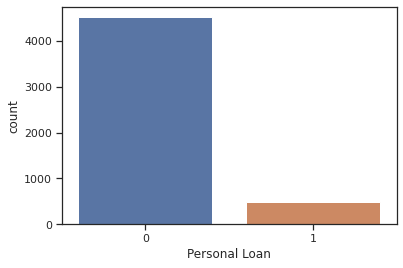

In [ ]:
sns.countplot(data['Personal Loan'],label='Count')


## **STEP 5**




### **Spliting Data into Training and test dataset**




**Defining X and Y**


In [ ]:
X = data.drop(labels= "Personal Loan" , axis = 1)
Y =data["Personal Loan"]


**Displaying X and Y**


In [ ]:
print(X,Y)

      Age    Income  Family  ...  CD Account  Online CreditCard
0      25  6.827583       4  ...           0       0          0
1      45  5.876952       3  ...           0       0          0
2      39  3.504287       1  ...           0       0          0
3      35  8.983393       1  ...           0       0          0
4      35  6.597314       4  ...           0       0          1
...   ...       ...     ...  ...         ...     ...        ...
4995   29  6.287699       1  ...           0       1          0
4996   30  4.077942       4  ...           0       1          0
4997   63  5.058173       2  ...           0       0          0
4998   65  6.827583       3  ...           0       1          0
4999   28  8.379274       3  ...           0       1          1

[5000 rows x 10 columns] 0       0
1       0
2       0
3       0
4       0
       ..
4995    0
4996    0
4997    0
4998    0
4999    0
Name: Personal Loan, Length: 5000, dtype: int64



**Spliting into training and test dataset.**




In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,stratify=Y,random_state=0)  
X_train.describe()

,Age,Income,Family,CCAvg,Education,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.153143,7.547143,2.393714,0.796972,1.871714,0.101714,0.058286,0.587143,0.299429
std,11.468384,1.969375,1.145023,0.413390,0.843481,0.302315,0.234316,0.492418,0.458073
min,23.000000,2.972350,1.000000,-0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,6.222469,1.000000,0.495347,1.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,7.585900,2.000000,0.829809,2.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,8.916412,3.000000,1.087901,3.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,11.976488,4.000000,1.779724,3.000000,1.000000,1.000000,1.000000,1.000000



**Scalar Preprocessing**


In [ ]:
sc_x=StandardScaler()
X_train=sc_x.fit_transform(X_train)
X_test=sc_x.fit_transform(X_test)


## **STEP 6**




### **Logistic Regression**




**Training the Model using Linear Regression**


In [ ]:
# Fit the model on train
classifier_LR= LogisticRegression(solver="liblinear").fit(X_train, Y_train)

#predict on test
Y_predict_LR = classifier_LR.predict(X_test)

coef_df = pd.DataFrame(classifier_LR.coef_)
coef_df['intercept'] = classifier_LR.intercept_
print(coef_df)

          0         1        2  ...         8         9  intercept
0  0.101692  3.417419  0.74235  ... -0.288044 -0.511042  -5.465704

[1 rows x 11 columns]



**Displaying the Model Score for testing and training data**



In [ ]:
test_score = classifier_LR.score(X_test, Y_test)
print("Model score for testing data : %3f" % test_score)
train_score = classifier_LR.score(X_train, Y_train)
print("Model score for training data : %3f" % train_score)

Model score for testing data : 0.954667
Model score for training data : 0.957143


In [ ]:
data.describe()

,Age,Income,Family,CCAvg,Education,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,45.338400,7.561003,2.396400,0.795804,1.881000,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.463166,1.961533,1.147663,0.413296,0.839869,0.294621,0.305809,0.23825,0.490589,0.455637
min,23.000000,2.972350,1.000000,-0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,35.000000,6.222469,1.000000,0.495347,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,45.000000,7.585900,2.000000,0.814468,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,55.000000,8.916412,3.000000,1.067696,3.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,67.000000,11.976488,4.000000,1.779724,3.000000,1.000000,1.000000,1.00000,1.000000,1.000000



## **STEP 7**




### **Evaluating Performace of Logistic Regression**




**Accuracy  for Logistic Regression**


In [ ]:
#Accuracy
LR_accuracy=metrics.accuracy_score(Y_test, Y_predict_LR)
print( 'Total Accuracy : ',LR_accuracy)

Total Accuracy :  0.9546666666666667



**Confusion Matrix for Logistic Regression**


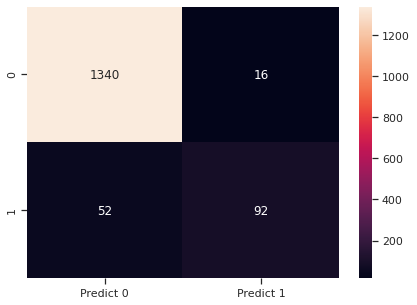

In [ ]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(Y_test,Y_predict_LR)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


From the above confusion matrix we can infer that there are 52 False Positive values.Lower the False positive greater is the performance of the model.
 


**F1 Score for Logistic Regression**


In [ ]:
F1_LR=f1_score(Y_test,Y_predict_LR, average='weighted')
F1_LR

0.9517255146600124


Linear Regression has an F1 Score of 95.1.



**Classification Report of Logistic Regression Model**


In [ ]:
print(classification_report(Y_test,Y_predict_LR))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1356
           1       0.85      0.64      0.73       144

    accuracy                           0.95      1500
   macro avg       0.91      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500




## **STEP 8**




### **Implementing different other models**


1.  K-Nearest Neighbour(KNN)
2.  Decision Tree Decision
3.  Random Forest
4.  Naive Bayes 






### **8.1 K-Nearest Neighbour(KNN)**

In [ ]:
k = 10
mean_accuracy = np.zeros((k-1))
std_accuracy = np.zeros((k-1))
for n in range(1,k):
    
    #Training Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,Y_train)
    Y_predict_KNN=knn.predict(X_test)

    #Finding mean accuracy
    mean_accuracy[n-1] = metrics.accuracy_score(Y_test,Y_predict_KNN)

    #Finding standard accuracy
    std_accuracy[n-1]=np.std(Y_predict_KNN==Y_test)/np.sqrt(Y_predict_KNN.shape[0])

mean_accuracy

array([0.966     , 0.95666667, 0.96266667, 0.95733333, 0.964     ,
       0.95466667, 0.95466667, 0.95466667, 0.956     ])

In [ ]:
print( "The best accuracy was with", mean_accuracy.max(), "with k=", mean_accuracy.argmax()+1)

The best accuracy was with 0.966 with k= 1



**Finding Accuracy of KNN Model**


In [ ]:
KNN_accuracy=metrics.accuracy_score(Y_test,Y_predict_KNN)
KNN_accuracy

0.956


KNN classifier has an accuracy of 95.6%.


In [ ]:
# Setting k as 4
k = 4

# Training Model and Predict  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,Y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [ ]:
Y_predict_KNN = knn.predict(X_test)
Y_predict_KNN[0:5]

array([1, 0, 0, 0, 0])

**Accuracy of Test and Training data**

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(Y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(Y_test, Y_predict_KNN))

Train set Accuracy:  0.9657142857142857
Test set Accuracy:  0.9573333333333334



**CONFUSION MATRIX FOR KNN**


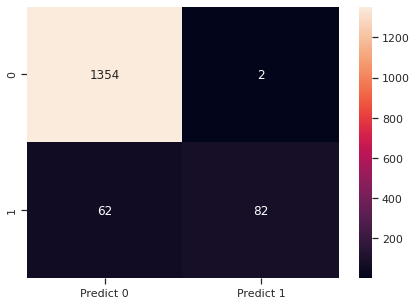

In [ ]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(Y_test,Y_predict_KNN)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


From the above confusion matrix we can infer that there are 62 False Positive values. Lower the False positive greater is the performance of the model. 



**F1 SCORE**


In [ ]:
F1_knn=f1_score(Y_test,Y_predict_KNN, average='weighted')
F1_knn

0.9521810587073745


KNN Classifier has F1 score of 95.2.



**Classification Report for KNN**


In [ ]:
print(classification_report(Y_test,Y_predict_KNN))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1356
           1       0.98      0.57      0.72       144

    accuracy                           0.96      1500
   macro avg       0.97      0.78      0.85      1500
weighted avg       0.96      0.96      0.95      1500




### **8.2 DECISION TREE**





**FITTING AND PREDICTING THE MODEL**


In [ ]:
classifier_DT = DecisionTreeClassifier(max_depth = 8,random_state=0)

# Fitting the Decision tree model
classifier_DT.fit(X_train,Y_train)

# Predict using the model
Y_predict_DT= classifier_DT.predict(X_test)
print("predicted",Y_predict_DT)

predicted [1 0 0 ... 0 0 0]



**ACCURACY OF THE MODEL**


In [ ]:
print("\nACCURACY OF TEST :",classifier_DT.score(X_test, Y_test))
print("\nACCURACY OF TRAIN  :",classifier_DT.score(X_train, Y_train))


ACCURACY OF TEST : 0.982

ACCURACY OF TRAIN  : 0.9954285714285714


In [ ]:
DT_accuracy=metrics.accuracy_score(Y_test,Y_predict_DT)
DT_accuracy

0.982


Decision Tree has an accuracy of 98.2%.



**Confusion Matrix for Decision Tree**


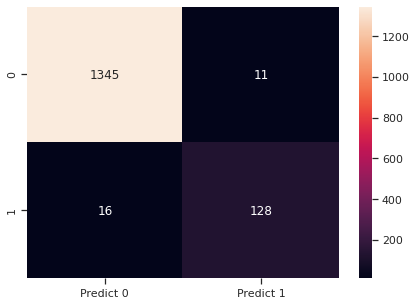

In [ ]:
cm=metrics.confusion_matrix(Y_test,Y_predict_DT)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


From the above confusion matrix we can infer that there are 16 False Positive values. Lower the False positive greater is the performance of the model.
 


**F1 SCORE**


In [ ]:
F1_DT=f1_score(Y_test,Y_predict_DT, average='weighted')
F1_DT

0.9818575517842767

Decision Tree Classifier has F1 Score of 98.1.


**Classification Report for Decision Tree Classifier**


In [ ]:
print (classification_report(Y_test,Y_predict_DT))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1356
           1       0.92      0.89      0.90       144

    accuracy                           0.98      1500
   macro avg       0.95      0.94      0.95      1500
weighted avg       0.98      0.98      0.98      1500




### **8.3 RANDOM FOREST CLASSIFIER**



In [ ]:
classifier_RFC=RandomForestClassifier(n_estimators=500,random_state=0,max_depth=7)

#Fitting the model
classifier_RFC.fit(X_train,Y_train)

#Predict using the model
Y_predict_RFC=classifier_RFC.predict(X_test)


**Accuracy for Random Forest Classifier**


In [ ]:
RFC_accuracy=metrics.accuracy_score(Y_test,Y_predict_RFC)
RFC_accuracy

0.984

There is 98.4% accuracy for Random Forest Classifier.


**Confusion Matrix for Random Tree Classifier**


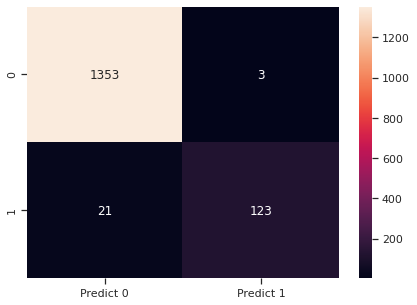

In [ ]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(Y_test,Y_predict_RFC)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


From the above confusion matrix we can infer that there are 21 False Positive values. Lower the False positive greater is the performance of the model. 



**F1 Score for Random Forest Classifier**


In [ ]:
F1_RFC=f1_score(Y_test,Y_predict_RFC,average='weighted')
F1_RFC

0.9835194139194139


Random Forest Classifier has F1 score of 98.3.


**Accuracy Score for Random Forest Classifier**

In [ ]:
test_score = classifier_RFC.score(X_test, Y_test)
print("Model score for testing data : %3f" % test_score)
train_score = classifier_RFC.score(X_train, Y_train)
print("Model score for training data : %3f" % train_score)

Model score for testing data : 0.984000
Model score for training data : 0.994000



**Classification Report for Random Forest Classifier**


In [ ]:
print(classification_report(Y_test,Y_predict_RFC))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1356
           1       0.98      0.85      0.91       144

    accuracy                           0.98      1500
   macro avg       0.98      0.93      0.95      1500
weighted avg       0.98      0.98      0.98      1500




### **8.4 NAIVE BAYES CLASSIFIER**


In [ ]:
classifier_NBC=GaussianNB()

#Fitting the model
classifier_NBC.fit(X_train,Y_train)

#Predict using the model
Y_predict_NBC=classifier_NBC.predict(X_test)


**Accuracy for Naive Bayes Classifier**


In [ ]:
test_score = classifier_NBC.score(X_test, Y_test)
print("Model score for testing data : %3f" % test_score)
train_score = classifier_NBC.score(X_train, Y_train)
print("Model score for training data : %3f" % train_score)

Model score for testing data : 0.918000
Model score for training data : 0.908571


In [ ]:
NBC_accuracy=metrics.accuracy_score(Y_test,Y_predict_NBC)
NBC_accuracy

0.918


Naive Bayes Classifier has an accuracy of 91.8%.



**Confusion Matrix for Naive Bayes Classifier**


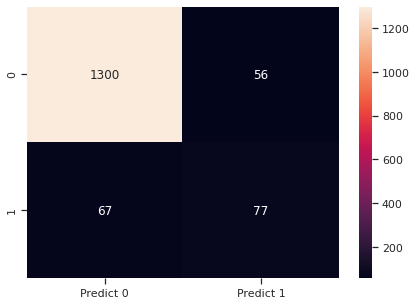

In [ ]:
#CONFUSION MATRIX
cm=metrics.confusion_matrix(Y_test,Y_predict_NBC)
df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],columns = [i for i in ["Predict 0","Predict 1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')


From the above confusion matrix we can infer that there are 67 False Positive values. Lower the False positive greater is the performance of the model. 



**F1 SCORE for Naive Bayes Classifer**


In [ ]:
F1_NBC=f1_score(Y_test,Y_predict_NBC,average='weighted')
F1_NBC

0.9165374673028659

Naive Bayes Classifier has F1 score of 91.6.


**Classification Report for Naive Bayes Classifier**


In [ ]:
print (classification_report(Y_test,Y_predict_NBC))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1356
           1       0.58      0.53      0.56       144

    accuracy                           0.92      1500
   macro avg       0.76      0.75      0.76      1500
weighted avg       0.92      0.92      0.92      1500




## **STEP 9**




### **Conclusion**






*   Had imported necessary libraries and the datafile.
*   The details about the data such as shape,description,datatype etc. were displayed.
*   In the Bank data, it was found that the 'Experience' column had noisy data(negative values) so we replaced it with median. Later we removed 'Experience' column since its having 98% correlation with 'Age' column.

*    Feature variables 'Income', 'CCavg' and 'Mortgage' were not normally distributed.This skewness was reduced by applying necessory transformation.

*    The 'Zip Code' had 467 unique values so it was not a useful data for prediction and so it was removed.
 
*    We tried out many classification algorithm and found out that both Decision Tree Classifier and Random Forest Classifier performed better with 98% accuracy.





In [ ]:
#F1_Scores of all classifiers
F1_scores=[F1_LR,F1_knn,F1_DT,F1_RFC,F1_NBC]
#Accuracy of all classifers
Accuracy=[LR_accuracy*100,KNN_accuracy*100,DT_accuracy*100,RFC_accuracy*100,NBC_accuracy*100]

table = {'Algorithm': ['Logistic Regression','KNN','Desision Tree', 'Random Forest Classifier','Naive Bayes'],
      'F1-score': F1_scores, 'Accuracy':Accuracy}

F_Report = pd.DataFrame(data=table, columns=['Algorithm', 'F1-score', 'Accuracy'], index=None)
print(F_Report)

                  Algorithm  F1-score   Accuracy
0       Logistic Regression  0.951726  95.466667
1                       KNN  0.952181  95.600000
2             Desision Tree  0.981858  98.200000
3  Random Forest Classifier  0.983519  98.400000
4               Naive Bayes  0.916537  91.800000



Logistic Regression have 95.47% accuracy and 52 False Positive values.





From the above table we can understand that Random Forest Classifier have highest accuracy compared to other classifiers.





Lower the False postive better is the performance of the model. From the various classifiers, the confusion matrix for Decision tree classifier had less number of False Positive(16). Random Forest classifier had 21 False Postive. Highest was found out in Naive Bayes Classifier.





###**Business understanding of the Model**






This model will help to predict the likelihood of a liability customer buying personal loans.The model with Random Forest Classifer performs with 98.4% accuracy and had 21 False Postive values.The model with Decision Tree Classifier perfoms with 98.2% accuracy and had only 16 False Postive values.





This model helps the bank to identify the potential customers who have a higher probability of purchasing the loan. This will increase the success ratio while at the same time reduce the cost of the campaign.

